Orginal cities {(-0.07739381136446444, 0.7977861637683987), (0.4412224721809128, 0.9750702436377797), (0.05770766705020525, 0.9812896652276937), (0.36602629069908044, 0.7491153400339735), (0.17976038548444354, 0.7497925685904574), (-0.08731028821275841, 0.5716613463275597), (0.053016516530339466, 0.9318907096280125), (0.06385561442320524, 0.8409469435306658), (0.0629056987183738, 0.4739732976506311), (0.12607871470071394, 0.7031488309844588), (0.4928112101746973, 0.8967410778581574), (0.17157539133456262, 0.7690553375057579), (0.24441745608725315, 0.8521077802069404), (-0.03356895700983037, 0.9969137694431672), (0.5914444491618414, 1.0604184312683484), (-0.010997518612138907, 0.3944302624056628), (0.08060149229134299, 0.6542038602429937), (0.16115328557593578, 0.7089065662833919), (0.07021679295015468, 0.3338081014372454), (0.05815363743553437, 0.5225169946634506), (0.19199529286351993, 1.0058825844836832), (0.06588628549901382, 0.6230466000142617), (0.09912040369191796, 0.990370631991

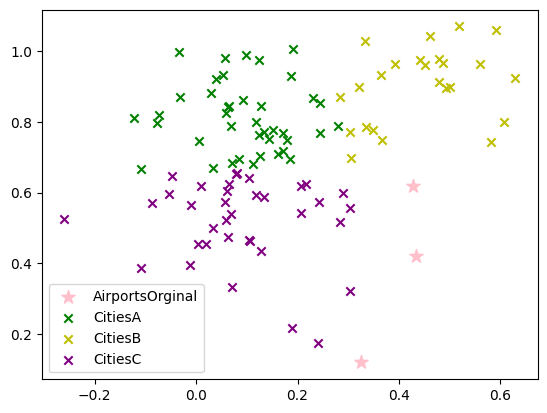

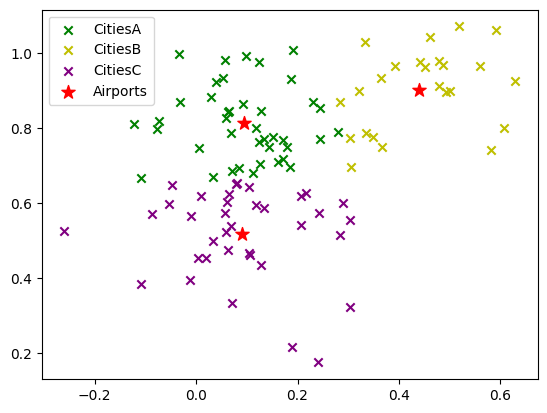

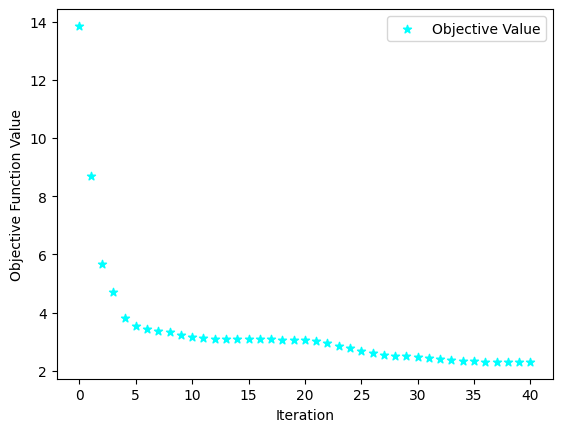

In [87]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


#Random restart function for when stuck in local minima
def restartAirportLocations(airports, numAirports):
    for i in range(numAirports):
        x = random.random()
        y = random.random()
        airports[i] = ((x,y))




def main():
    num_city = 100
    num_air = 3
    num_center = 5
    sigma = 0.1
    cities = set()
    airports = []

    for i in range(num_center):
        x = random.random()
        y = random.random()
        xc = np.random.normal(x, sigma, num_city//num_center)
        yc = np.random.normal(y, sigma, num_city//num_center)
        cities = cities.union(zip(xc, yc))


    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y))


    #Create set of cities for closest airport
    cityA = set()
    cityB = set()
    cityC = set()

    closeCityList = []
    closeCityList.append(cityA)
    closeCityList.append(cityB)
    closeCityList.append(cityC)

    #findClosestCity(cities, airports, cityA, cityB, cityC)
    #val = objectiveFunct(closeCityList, airports)
    #print('obj val: ', val)

    #Array of the objective values calculated
    objVals = []
    prevObjVal = 10000

    #Hold orginal airport locations
    temp1 = airports[0]
    temp2 = airports[1]
    temp3 = airports[2]
    airportOrgin = []
    airportOrgin.append(temp1)
    airportOrgin.append(temp2)
    airportOrgin.append(temp3)


    #Check the objective function value changes
    change = 10
    iteration = 0
    alpha = 0.01

    print('Orginal cities', cities)
    print('Orginal airports: ', airports)

    #Repeat objective function till minimal change
    while (change > 0.0001):

        #Group together cities closest to a specific airport
        findClosestCity(cities, airports, cityA, cityB, cityC)
        print('length of cityA', len(cityA))

        #Calculate objective function value
        val = objectiveFunct(closeCityList, airports)
        objVals.append((iteration, val))
        iteration = iteration + 1

        #Check to see if converge to solution
        change = abs(val - prevObjVal)
        prevObjVal = val

        #For each airport
        for i in range(len(airports)):
            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Calculate summations for each individual city and individual axis
            summationX = 0
            summationY = 0

            #For each city closest to a particular airport
            for city in closeCityList[i]:
                cityXCord = city[0]
                cityYCord = city[1]

                summationX = summationX + (airportXCord - cityXCord)
                summationY = summationY + (airportYCord - cityYCord)

            #After completing summations, multiply by 2 for partial derivatives
            gradientX = summationX * 2
            gradientY = summationY * 2
            #print('PREgradients for airport ', i , ' ', gradientX, gradientY)

            #Multiply with small constant
            gradientX = gradientX * alpha
            gradientY = gradientY * alpha


            #print('gradients for airport ', i , ' ', gradientX, gradientY)
            #airports[i] = (gradientX, gradientX)

            #Update location of airport
            newLocX = airportXCord - gradientX
            newLocY = airportYCord - gradientY
            airports[i] = (newLocX, newLocY)


            #Stuck in local minima, reset airport locations
            if( (len(cityA) == 0) | (len(cityB) == 0) | (len(cityC) == 0) ):
                restartAirportLocations(airports, num_air)
                print('restart airport locations')
                print()
                print()
                print()



    print ('final airport cords', airports)
    print('final cities:',cities)
    print('cityA: ', cityA)
    print('cityB: ', cityB)
    print('cityC: ', cityC)



    import matplotlib.pyplot as plt


    #Orginal state
    plt.figure(3)
    zip_airsOrgin = zip(*airportOrgin)
    plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

    zip_citiesA = zip(*cityA)
    if(len(cityA) != 0):
        plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

    zip_citiesB = zip(*cityB)
    if(len(cityB) != 0):
        plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

    zip_citiesC = zip(*cityC)
    if(len(cityC) != 0):
        plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

    #zip_cities = zip(*cities)
    #plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    plt.legend()

    #Plot figure for locations
    plt.figure(1)
    zip_citiesA = zip(*cityA)
    if(len(cityA) != 0):
        plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

    zip_citiesB = zip(*cityB)
    if(len(cityB) != 0):
        plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

    zip_citiesC = zip(*cityC)
    if(len(cityC) != 0):
        plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

    #zip_cities = zip(*cities)
    #plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

    #zip_airsOrgin = zip(*airportOrgin)
    #plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')
    #plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')
    plt.legend()


    #Plot figure for objective values
    plt.figure(2)
    zip_objFuncVal = zip(*objVals)
    plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')


    plt.legend()


if __name__ == "__main__":
    main()


